In [70]:
%env CUDA_VISIBLE_DEVICES=0
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
# data = jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/turb/meas_func1/mcmc_samples_parallel_noisy.npy") 
data = jnp.load("/ehome/yaqin/conditional-flow-matching/physics_flow_matching/multi_fidelity/analysis/inverse_problems/turb/meas_func2/dpmcstep100noise.npy") 

d =  jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_.npy")
m = d.mean(axis=(0,2,3), keepdims=True)
std = d.std(axis=(0,2,3), keepdims=True)
data_downsampled = jnp.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/multi_fidelity/synthetic/turb/turb_128_test_.npy")

data = data*std + m
comp = 2
dz = 2*jnp.pi/128
dx = 4*jnp.pi/128
tke_ground =  jax.scipy.signal.welch(data[:, comp],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)   #jax.scipy.signal.welch(data[:, comp, 64:],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)
tke_ground_downsample = jax.scipy.signal.welch(data_downsampled[:, comp],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)  # jax.scipy.signal.welch(data_downsampled[:, comp, 64:],fs=1/dx,scaling='spectrum',axis=1, nperseg=64)

env: CUDA_VISIBLE_DEVICES=0


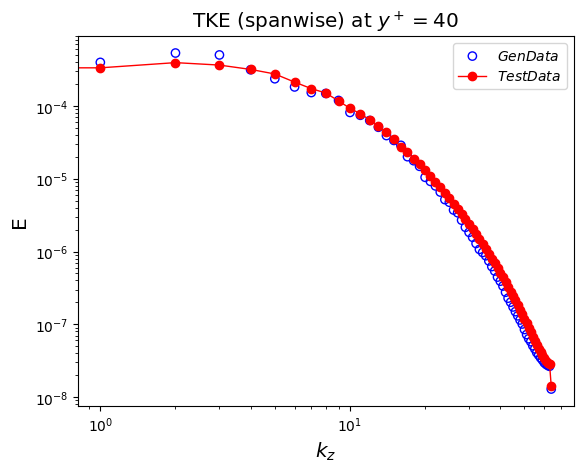

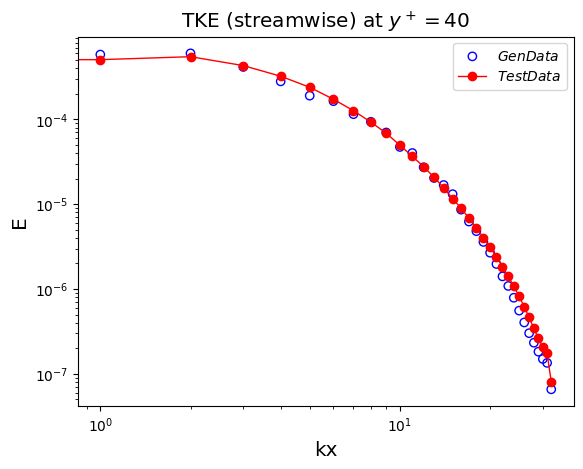

In [71]:
# Calculate TKE for the spanwise direction (axis=-1)
tke_ground_spanwise = jax.scipy.signal.welch(data[:, comp], fs=1/dz, scaling='spectrum', axis=-1, nperseg=128)
tke_ground_downsample_spanwise = jax.scipy.signal.welch(data_downsampled[:, comp], fs=1/dz, scaling='spectrum', axis=-1, nperseg=128)

# Calculate TKE for the streamwise direction (axis=-2)
tke_ground_streamwise = jax.scipy.signal.welch(data[:, comp], fs=1/dx, scaling='spectrum', axis=-2, nperseg=128)
tke_ground_downsample_streamwise = jax.scipy.signal.welch(data_downsampled[:, comp], fs=1/dx, scaling='spectrum', axis=-2, nperseg=128)


# --- Plot 1: Spanwise TKE (Corrected to use new variables) ---
plt.figure()
# Average over batch and streamwise dimensions (0, 1)
plt.scatter(2*jnp.pi*tke_ground_spanwise[0], tke_ground_spanwise[1].mean(axis=(0,1)), label=rf'$Gen Data$', edgecolors="blue", linewidth=1, marker='o', facecolors='none')
plt.plot(2*jnp.pi*tke_ground_downsample_spanwise[0], tke_ground_downsample_spanwise[1].mean(axis=(0,1)), label=rf'$Test Data$', color="red", linewidth=1, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title(rf'TKE (spanwise) at $y^+={40}$', fontsize='x-large')
plt.xlabel(r'$k_z$', fontsize='x-large') # Using k_z for spanwise
plt.ylabel('E', fontsize='x-large')
plt.legend()
plt.show()


plt.figure()
plt.scatter(2*jnp.pi*tke_ground[0], tke_ground[1].mean(axis=(0,-1)),label=rf'$Gen Data$', edgecolors="blue", linewidth=1, marker='o', facecolors='none')
plt.plot(2*jnp.pi*tke_ground_downsample[0], tke_ground_downsample[1].mean(axis=(0,-1)),label=rf'$Test Data$', color="red", linewidth=1, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title(rf'TKE (streamwise) at $y^+={40}$', fontsize='x-large')
plt.xlabel('kx',fontsize='x-large')
plt.ylabel('E',fontsize='x-large')
plt.legend()
plt.show()

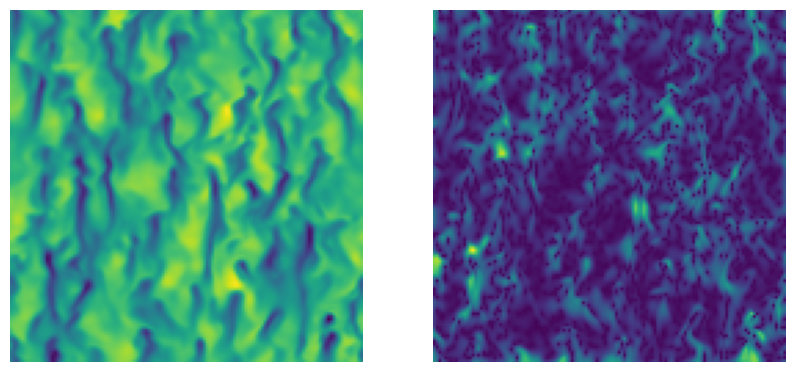

<Figure size 640x480 with 0 Axes>

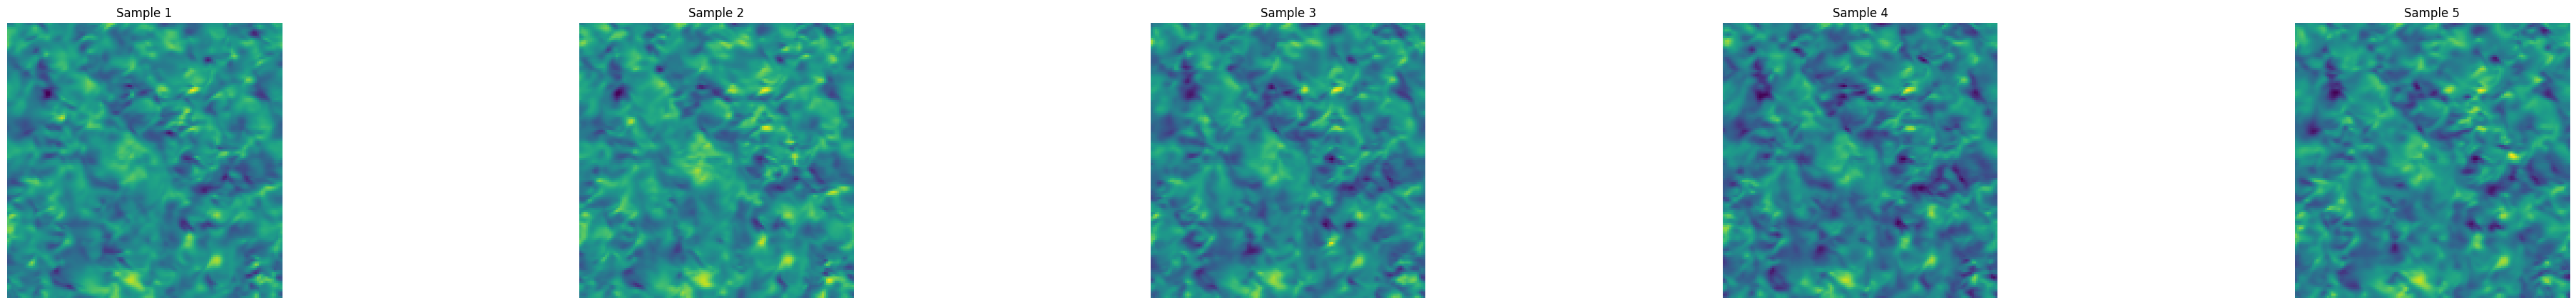

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(data[:, 0].mean(axis=0))
axes[0].axis('off')
axes[1].imshow(data[:, 0].std(axis=0))
axes[1].axis('off')

plt.figure()
fig, axes = plt.subplots(1, 5, figsize=(50, 5))
for i in range(5):
    axes[i].imshow(data[i, 2])
    axes[i].set_title(f'Sample {i+1}')
    axes[i].axis('off')
    
# plt.figure()
# for i in range(5):
#     fig, axes = plt.subplots(1, 3, figsize=(10, 5))
#     axes[0].imshow(X[3, 0], vmax=3, vmin=-3)
#     axes[0].set_title('GT')
#     a = axes[1].imshow(data[i, 0], vmax=3, vmin=-3)
#     axes[1].set_title('Sampled Output')
#     fig.colorbar(ax=axes[1], mappable=a, fraction = 0.05)
#     b = axes[2].imshow(np.abs(X[3, 0] - data[i, 0]), vmax=0.1, vmin=-0.1)
#     axes[2].set_title('Absolute Difference')
#     fig.colorbar(ax=axes[2], mappable=b, fraction = 0.05)
#     plt.tight_layout()
#     plt.show()